<a href="https://colab.research.google.com/github/SushilKokare/University_Project/blob/Keras_Applications/35_ConvNeXtSmall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications import ConvNeXtSmall
from matplotlib import pyplot as plt

In [ ]:
def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()

In [ ]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape
     

In [ ]:

pathTrain  = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'

pathTest ='/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'
  

In [ ]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)
    

Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [ ]:
base_model = ConvNeXtSmall(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)
 

198551472/198551472 [==============================] - 2s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
71/71 [==============================] - 253s 3s/step - loss: 1.1286 - accuracy: 0.6384 - val_loss: 0.6056 - val_accuracy: 0.7120
Epoch 2/10
71/71 [==============================] - 33s 467ms/step - loss: 0.5016 - accuracy: 0.7574 - val_loss: 0.5334 - val_accuracy: 0.7400
Epoch 3/10
71/71 [==============================] - 33s 460ms/step - loss: 0.3514 - accuracy: 0.8570 - val_loss: 0.6828 - val_accuracy: 0.6800
Epoch 4/10
71/71 [==============================] - 33s 463ms/step - loss: 0.2919 - accuracy: 0.8880 - val_loss: 0.6028 - val_accuracy: 0.7040
Epoch 5/10
71/71 [==============================] - 33s 462ms/step - loss: 0.2314 - accuracy: 0.9187 - val_loss: 0.5683 - val_accuracy: 0.7200
Epoch 6/10
71/71 [==============================] - 35s 488ms/step - loss: 0.2735 - accuracy: 0.8823 - val_loss: 0.7364 - val_accuracy: 0.6800
Epoch 7/10
71/71 [==============================] - 35s 491ms/step - loss: 0.2359 - accuracy: 0.8952 - val_loss: 0.4489 - val_accuracy: 0.7880
E

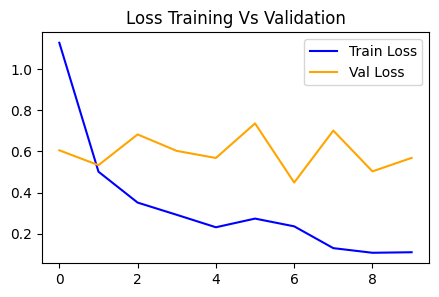

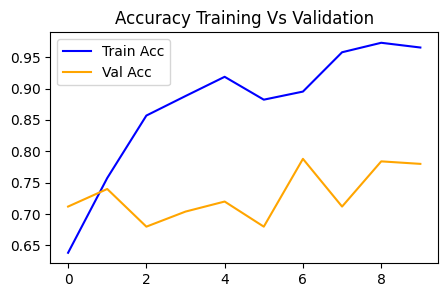

In [ ]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

show_result(history)

In [ ]:
import pandas as pd

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.128596,0.638383,0.605644,0.712
1,0.501638,0.757441,0.533427,0.740
2,0.351408,0.856952,0.682828,0.680
3,0.291912,0.888050,0.602816,0.704
4,0.231372,0.918703,0.568305,0.720
5,0.273547,0.882275,0.736446,0.680
6,0.235874,0.895158,0.448866,0.788
7,0.129804,0.957797,0.701559,0.712
8,0.107300,0.972901,0.503131,0.784
9,0.109893,0.965349,0.568798,0.780
